In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [4]:
from control_policy import k_step_sarsa, test_policy, q_learning, td_lambda
from blackjack_simulator import BlackJack as Environment
from evaluate_policy import k_step_td, mc_first_visit, k_step_td
from tabular_rl import eval_dealer_policy, learn_policy

## Evaluating Dealer policy

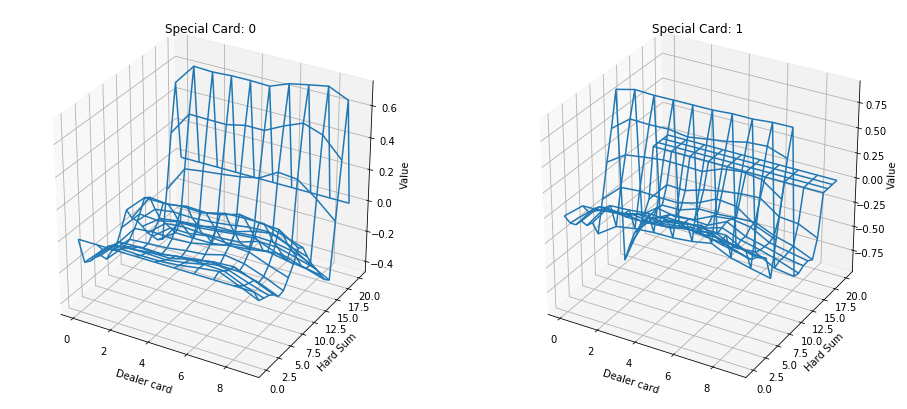

In [3]:
# eval algo 
# 0 mc_first_visit
# 1 mc_every_visit
# 2 k_step_td
q_dealer = eval_dealer_policy(eval_algo=0,num_expt=10, num_episodes=100000)

## Learning Optimal Policy

### Comparing algorithms

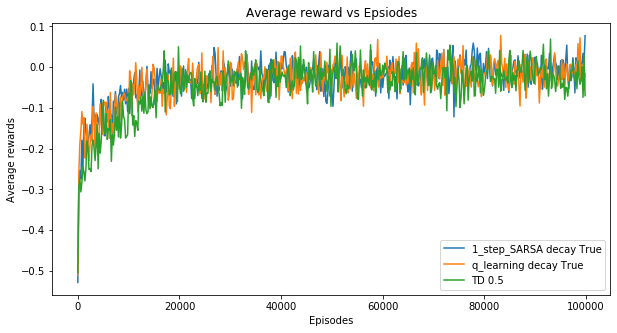

In [6]:
fig = plt.figure(figsize=(10,5))
p1,s1 = k_step_sarsa(number_of_episodes=100000, decay_epsilon=True, plot_frequency=200,k_step=1, test_episodes=1000, lr=0.1)
p2,s2 = q_learning(number_of_episodes=100000, decay_epsilon=True, plot_frequency=200, test_episodes=1000, lr=0.1)
p3,s3 = td_lambda(number_of_episodes=100000, decay_epsilon=True, plot_frequency=200, test_episodes=1000, lr=0.1)
plt.xlabel("Episodes")
plt.ylabel("Average rewards")
plt.legend(loc="best")

### Effect of epsilon decay

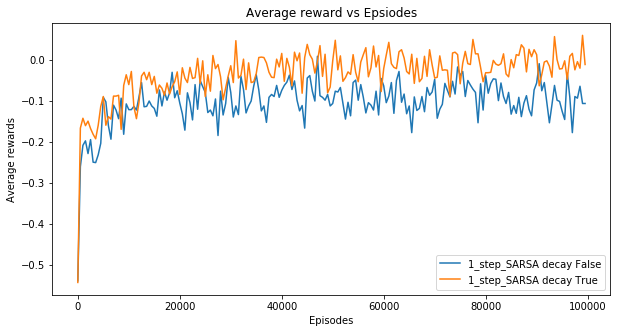

In [11]:
fig = plt.figure(figsize=(10,5))
p1,s1 = k_step_sarsa(number_of_episodes=100000, decay_epsilon=False, plot_frequency=500, test_episodes=1000)
p2,s2 = k_step_sarsa(number_of_episodes=100000, decay_epsilon=True, plot_frequency=500, test_episodes=1000)
plt.xlabel("Episodes")
plt.ylabel("Average rewards")
plt.legend(loc="best")

### Effect of modifying alpha

In [12]:
%%capture
alpha_list=[0.01,0.02,0.05,0.1,0.2,0.3]
sarsa = []
ql = []
et = []
for alpha in alpha_list:
    p1,s1 = k_step_sarsa(number_of_episodes=10000, decay_epsilon=True, plot_frequency=20000,k_step=1, test_episodes=100, lr=alpha)
    sarsa.append(test_policy(p1,10000))
    p1,s1 = q_learning(number_of_episodes=10000, decay_epsilon=True, plot_frequency=20000, test_episodes=100, lr=alpha)
    ql.append(test_policy(p1,10000))
    p1,s1 = td_lambda(number_of_episodes=10000, decay_epsilon=True, plot_frequency=20000, test_episodes=100, lr=alpha)
    et.append(test_policy(p1,10000))

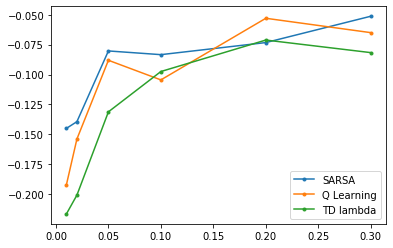

In [13]:
plt.plot(alpha_list,sarsa,".-",label="SARSA")
plt.plot(alpha_list,ql,".-",label="Q Learning")
plt.plot(alpha_list,et,".-",label="TD lambda")
plt.legend()

### Plotting value function for learnt policy

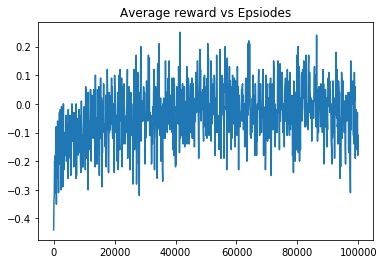

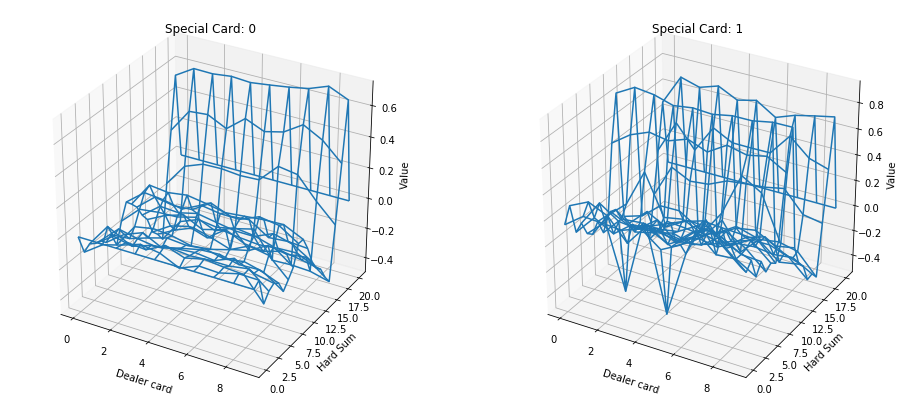

In [14]:
policy, q, scores = learn_policy(algo=1, num_episodes=100000, test_episodes=100)